In [1]:
# INPUT: experiment name
study_name = 'homing_cmpt'
experiment_name = 'base'
# cmpt_types = ['s','p','ss','pp','sp']
cmpt_types = ['s','ss']
# cmpt_types = ['ss']
var_name = 'cmpt_type'
# var_dict = {'cmpt_type': ['s', 'p', 'ss', 'pp', 'sp']}  # assumes full enumeration

In [2]:
# Create var dict based on input
var_dict = {'cmpt_type': cmpt_types}  # assumes full enumeration

In [3]:
import os
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
import math
path = os.getcwd()
res_path = path

In [4]:
# Make folder for experiment if it doesn't exist
experiment_path = os.path.join(res_path, 'plots', experiment_name)
if not os.path.exists(os.path.join(res_path, 'plots')):
    os.mkdir(os.path.join(res_path, 'plots'))
if not os.path.exists(experiment_path):
    os.mkdir(experiment_path)

In [5]:
# Determine scenarios - enumerating based on input
keys, values_lists = zip(*var_dict.items())
scenarios = list(itertools.product(*values_lists))
scenario_names = ['-'.join(f"{key}-{value}" for key, value in zip(keys, scenario)) for scenario in scenarios]
scenario_names = [s.replace('cmpt_type-','') for s in scenario_names]  # drop 'cmpt_type' from scn name

In [6]:
def open_pickle_repl(scn_name, aggr_scn_path, pkl_name):
    with open(os.path.join(aggr_scn_path, pkl_name), 'rb') as f:
        df = pickle.load(f)
        index_list = ['cmpt_type'] + ['repl', 'day']
        df['cmpt_type'] = scn_name
        df = df.reset_index().set_index(index_list)
    return df

In [7]:
scenario_names

['s', 'ss']

In [8]:
# Loop over scenarios, creating list of df's containing the data, and converting to single df
aggr_dem_list = []
aggr_sup_list = []
# mode_no_rs_list = []
mode_df = pd.DataFrame()
for scn_name in scenario_names:
    # Determine scenario values and save them to dict
    # scn_name_split = scn_name.split('-')
    # scn_dict = {}
    # for i in range(1, len(scn_name_split), 2):
    #     variable_name = scn_name_split[i]
    #     print(variable_name)
    #     variable_value = scn_name_split[i + 1]
    #     print(variable_value)
    #     scn_dict[variable_name] = variable_value
    # scn_dict['cmpt_type'] = scn_name_split[0]
    # List all folders and find those corresponding to the specific scenario
    # aggr_scn_path = os.path.join(res_path, 'aggr_repl', scn_name) if float(variable_value) != ref_value else os.path.join(res_path, 'aggr_repl', scn_name.split("-")[0])
    aggr_scn_path = os.path.join(res_path, 'aggr_repl', scn_name)
    all_items = os.listdir(aggr_scn_path)
    aggr_dem = open_pickle_repl(scn_name, aggr_scn_path, 'repl_dem_select.pkl')
    aggr_sup = open_pickle_repl(scn_name, aggr_scn_path, 'repl_sup_select.pkl')

    # with open(os.path.join(aggr_scn_path, 'mode_no_rs.pkl'), 'rb') as f:
    #     mode_series = pickle.load(f)
    #     for key, value in scn_dict.items():
    #         mode_series[key] = value
    #     mode_df = mode_df.append(mode_series, ignore_index=True)
    aggr_dem_list = aggr_dem_list + [aggr_dem]
    aggr_sup_list = aggr_sup_list + [aggr_sup]
    # mode_no_rs_list = mode_no_rs_list + [df]
aggr_dem = pd.concat(aggr_dem_list)
aggr_sup = pd.concat(aggr_sup_list)
# mode_no_rs = pd.concat(mode_no_rs_list)

In [9]:
# # aggr_dem.columns = aggr_dem.columns.droplevel(0)
# # aggr_dem.columns.name = None               #remove categories
# aggr_dem = aggr_dem.reset_index().set_index(['cmpt_type','repl','day'])   
# aggr_dem
# # aggr_dem.reset_index()
# # aggr_dem.requests_0

In [10]:
# aggr_sup.xs('ss').ptcp_sh_0.tail(50)
aggr_dem.xs(('ss', 3)).exp_corr_wait_sh_1.tail(50)


day
197   NaN
198   NaN
199   NaN
200   NaN
201   NaN
202   NaN
203   NaN
204   NaN
205   NaN
206   NaN
207   NaN
208   NaN
209   NaN
210   NaN
211   NaN
212   NaN
213   NaN
214   NaN
215   NaN
216   NaN
217   NaN
218   NaN
219   NaN
220   NaN
221   NaN
222   NaN
223   NaN
224   NaN
225   NaN
226   NaN
227   NaN
228   NaN
229   NaN
230   NaN
231   NaN
232   NaN
233   NaN
234   NaN
235   NaN
236   NaN
237   NaN
238   NaN
239   NaN
240   NaN
241   NaN
242   NaN
243   NaN
244   NaN
245   NaN
246   NaN
Name: exp_corr_wait_sh_1, dtype: float64

In [11]:
aggr_dem.keys()

Index(['informed_mh', 'informed_sh', 'registered_mh', 'registered_sh_0',
       'registered_sh_1', 'requests_mh', 'requests_sh_0', 'requests_sh_1',
       'gets_offer_mh_0', 'gets_offer_mh_1', 'gets_offer_sh_0',
       'gets_offer_sh_1', 'accepts_offer_mh_0', 'accepts_offer_mh_1',
       'exp_wait_mh', 'exp_wait_sh_0', 'exp_wait_sh_1', 'exp_corr_wait_mh',
       'exp_corr_wait_sh_0', 'exp_corr_wait_sh_1', 'exp_detour_mh',
       'exp_detour_sh_0', 'exp_detour_sh_1', 'exp_km_fare_mh',
       'exp_km_fare_sh_0', 'exp_km_fare_sh_1', 'perc_wait_mh',
       'perc_wait_sh_0', 'perc_wait_sh_1', 'perc_detour_mh',
       'perc_detour_sh_0', 'perc_detour_sh_1', 'perc_km_fare_mh',
       'perc_km_fare_sh_0', 'perc_km_fare_sh_1', 'ptcp_dem_mh',
       'ptcp_dem_sh_0', 'ptcp_sup_mh', 'ptcp_sup_sh_0', 'ptcp_dem_sh_1',
       'ptcp_sup_sh_1', 'requests_sh_largest', 'gets_offer_mh_largest',
       'accepts_offer_mh_largest', 'exp_wait_sh_largest',
       'exp_wait_sh_smallest', 'exp_corr_wait_sh_large

In [12]:
# Add scenario label
non_day_level = [level for level in aggr_dem.index.names if level != 'day' and level !='repl'] # Find the scenario indices
if len(non_day_level) == 1:
    aggr_dem['label'] = aggr_dem.index.get_level_values(non_day_level[0])
    aggr_sup['label'] = aggr_sup.index.get_level_values(non_day_level[0])
else:
    aggr_dem['label'] = aggr_dem.index.to_frame(index=False)[non_day_level].astype(str).apply(lambda row: '_'.join(row))
    aggr_sup['label'] = aggr_sup.index.to_frame(index=False)[non_day_level].astype(str).apply(lambda row: '_'.join(row))

In [13]:
non_day_level

['cmpt_type']

In [14]:
aggr_sup
# result = aggr_sup.groupby(level='day').sum().xs(('sp', 0), level=['cmpt_type', 'repl'])

informed_mh  informed_sh  registered_mh  registered_sh_0  \
cmpt_type repl day                                                             
s         0    0            NaN          644            NaN              234   
               1            NaN          748            NaN              234   
               2            NaN          819            NaN              229   
               3            NaN          910            NaN              230   
               4            NaN         1004            NaN              239   
...                         ...          ...            ...              ...   
ss        4    282          NaN         2500            NaN              573   
               283          NaN         2500            NaN              571   
               284          NaN         2500            NaN              572   
               285          NaN         2500            NaN              569   
               286          NaN         2500            NaN              566   

                    registered_sh_1  ptcp_mh  ptcp_sh_0  ptcp_sh_1  \
cmpt_type repl day                                                   
s         0    0                NaN      NaN        144        NaN   
               1                NaN      NaN        134        NaN   
               2                NaN      NaN        129        NaN   
               3                NaN      NaN        123        NaN   
               4                NaN      NaN        130        NaN   
...                             ...      ...        ...        ...   
ss        4    282              0.0      NaN        459        0.0   
               283              0.0      NaN        457        0.0   
               284              0.0      NaN        459        0.0   
               285              0.0      NaN        464        0.0   
               286              0.0      NaN        459        0.0   

                    exp_inc_mh  exp_inc_sh_0  ...  ptcp_sup_mh  ptcp_sup_sh_0  \
cmpt_type repl day                            ...                               
s         0    0           NaN     87.878872  ...          NaN            NaN   
               1           NaN     95.047239  ...          NaN            NaN   
               2           NaN    103.120252  ...          NaN            NaN   
               3           NaN    115.706159  ...          NaN            NaN   
               4           NaN    122.038962  ...          NaN            NaN   
...                        ...           ...  ...          ...            ...   
ss        4    282         NaN    116.264831  ...            0            459   
               283         NaN    117.209338  ...            0            459   
               284         NaN    116.508981  ...            0            459   
               285         NaN    116.520113  ...            0            459   
               286         NaN    115.990528  ...            0            459   

                    ptcp_dem_sh_1  ptcp_sup_sh_1  ptcp_sh_largest  \
cmpt_type repl day                                                  
s         0    0              NaN            NaN              NaN   
               1              NaN            NaN              NaN   
               2              NaN            NaN              NaN   
               3              NaN            NaN              NaN   
               4              NaN            NaN              NaN   
...                           ...            ...              ...   
ss        4    282              0              0            459.0   
               283              0              0            457.0   
               284              0              0            459.0   
               285              0              0            464.0   
               286              0              0            459.0   

                    exp_inc_sh_largest  exp_inc_sh_smallest  \
cmpt_type repl day                                   

In [15]:
aggr_dem.keys()

Index(['informed_mh', 'informed_sh', 'registered_mh', 'registered_sh_0',
       'registered_sh_1', 'requests_mh', 'requests_sh_0', 'requests_sh_1',
       'gets_offer_mh_0', 'gets_offer_mh_1', 'gets_offer_sh_0',
       'gets_offer_sh_1', 'accepts_offer_mh_0', 'accepts_offer_mh_1',
       'exp_wait_mh', 'exp_wait_sh_0', 'exp_wait_sh_1', 'exp_corr_wait_mh',
       'exp_corr_wait_sh_0', 'exp_corr_wait_sh_1', 'exp_detour_mh',
       'exp_detour_sh_0', 'exp_detour_sh_1', 'exp_km_fare_mh',
       'exp_km_fare_sh_0', 'exp_km_fare_sh_1', 'perc_wait_mh',
       'perc_wait_sh_0', 'perc_wait_sh_1', 'perc_detour_mh',
       'perc_detour_sh_0', 'perc_detour_sh_1', 'perc_km_fare_mh',
       'perc_km_fare_sh_0', 'perc_km_fare_sh_1', 'ptcp_dem_mh',
       'ptcp_dem_sh_0', 'ptcp_sup_mh', 'ptcp_sup_sh_0', 'ptcp_dem_sh_1',
       'ptcp_sup_sh_1', 'requests_sh_largest', 'gets_offer_mh_largest',
       'accepts_offer_mh_largest', 'exp_wait_sh_largest',
       'exp_wait_sh_smallest', 'exp_corr_wait_sh_large

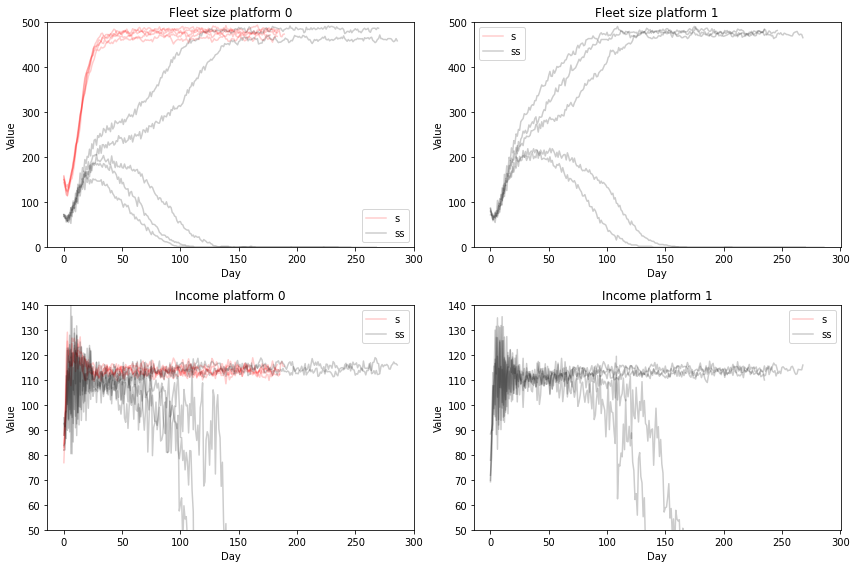

In [16]:
# Get unique 'a' values
# unique_cmpt_values = aggr_sup.index.get_level_values('cmpt_type').unique()
unique_cmpt_values = aggr_sup.index.get_level_values(var_name).unique()

# Create subplots
fig, axes = plt.subplots(2,2, figsize=(12, 8))

indicators = ['ptcp_sh', 'exp_inc_sh']
indicator_labels = ['Fleet size', 'Income']
colors = ['r','k','g','b','y']

for i, cmpt_type in enumerate(unique_cmpt_values):
    for j, indicator in enumerate(indicators):
        for plf in [0,1]:
            ax = axes[j, plf]
            for repl in aggr_sup.xs((cmpt_type)).index.get_level_values('repl').unique():
                subset = aggr_sup.loc[(cmpt_type, repl), indicator + '_{}'.format(plf)]
                day_values = subset.index.get_level_values('day')
                values = subset.values
                non_nan_indices = ~np.isnan(values)
                if repl == aggr_sup.xs((cmpt_type)).index.get_level_values('repl').unique()[-1]:
                    ax.plot(day_values[non_nan_indices], values[non_nan_indices], label='{}'.format(cmpt_type),color=colors[i], alpha=0.2)
                else:
                    ax.plot(day_values[non_nan_indices], values[non_nan_indices],color=colors[i], alpha=0.2)
            # ax.set_title(f'a={a_value} - {column}')
            ax.set_xlabel('Day')
            ax.set_ylabel('Value')
            ax.set_title('{} platform {}'.format(indicator_labels[j],plf))
            ax.legend()

axes[0,0].set_ylim(0,500)
axes[0,1].set_ylim(0,500)
axes[1,0].set_ylim(50,140)
axes[1,1].set_ylim(50,140)

plt.tight_layout()
plt.savefig(os.path.join(experiment_path,'Evo-supply.png'), facecolor='w')
plt.show()


In [17]:
# Replace zero service rate, waiting time and income by NaN if no driver or trav participates
aggr_dem.loc[aggr_sup['ptcp_sh_0'] == 0, ['exp_wait_sh_0', 'exp_detour_sh_0']] = np.nan
aggr_sup.loc[aggr_sup['ptcp_sh_0'] == 0, ['exp_inc_sh_0']] = np.nan
aggr_dem.loc[aggr_dem['requests_sh_0'] == 0, ['exp_corr_wait_sh_0', 'exp_wait_sh_0', 'exp_detour_sh_0']] = np.nan
aggr_dem.loc[aggr_sup['ptcp_sh_1'] == 0, ['exp_wait_sh_1', 'exp_detour_sh_1']] = np.nan
aggr_sup.loc[aggr_sup['ptcp_sh_1'] == 0, ['exp_inc_sh_1']] = np.nan
aggr_dem.loc[aggr_dem['requests_sh_1'] == 0, ['exp_corr_wait_sh_1', 'exp_wait_sh_1', 'exp_detour_sh_1']] = np.nan
aggr_sup['ptcp_sh_smallest'] = aggr_sup.ptcp_sh_0 + aggr_sup.get('ptcp_sh_1', 0) - aggr_sup.ptcp_sh_largest
aggr_sup.loc[aggr_sup['ptcp_sh_smallest'] == 0, ['exp_inc_sh_smallest']] = np.nan
aggr_dem['requests_sh_smallest'] = aggr_dem['requests_sh_0'] + aggr_dem['requests_sh_1'] - aggr_dem['requests_sh_largest']
aggr_dem.loc[aggr_dem['requests_sh_smallest'] == 0, ['exp_corr_wait_sh_smallest', 'exp_wait_sh_smallest']] = np.nan


In [18]:
aggr_sup.keys()
aggr_dem.keys()

Index(['informed_mh', 'informed_sh', 'registered_mh', 'registered_sh_0',
       'registered_sh_1', 'requests_mh', 'requests_sh_0', 'requests_sh_1',
       'gets_offer_mh_0', 'gets_offer_mh_1', 'gets_offer_sh_0',
       'gets_offer_sh_1', 'accepts_offer_mh_0', 'accepts_offer_mh_1',
       'exp_wait_mh', 'exp_wait_sh_0', 'exp_wait_sh_1', 'exp_corr_wait_mh',
       'exp_corr_wait_sh_0', 'exp_corr_wait_sh_1', 'exp_detour_mh',
       'exp_detour_sh_0', 'exp_detour_sh_1', 'exp_km_fare_mh',
       'exp_km_fare_sh_0', 'exp_km_fare_sh_1', 'perc_wait_mh',
       'perc_wait_sh_0', 'perc_wait_sh_1', 'perc_detour_mh',
       'perc_detour_sh_0', 'perc_detour_sh_1', 'perc_km_fare_mh',
       'perc_km_fare_sh_0', 'perc_km_fare_sh_1', 'ptcp_dem_mh',
       'ptcp_dem_sh_0', 'ptcp_sup_mh', 'ptcp_sup_sh_0', 'ptcp_dem_sh_1',
       'ptcp_sup_sh_1', 'requests_sh_largest', 'gets_offer_mh_largest',
       'accepts_offer_mh_largest', 'exp_wait_sh_largest',
       'exp_wait_sh_smallest', 'exp_corr_wait_sh_large

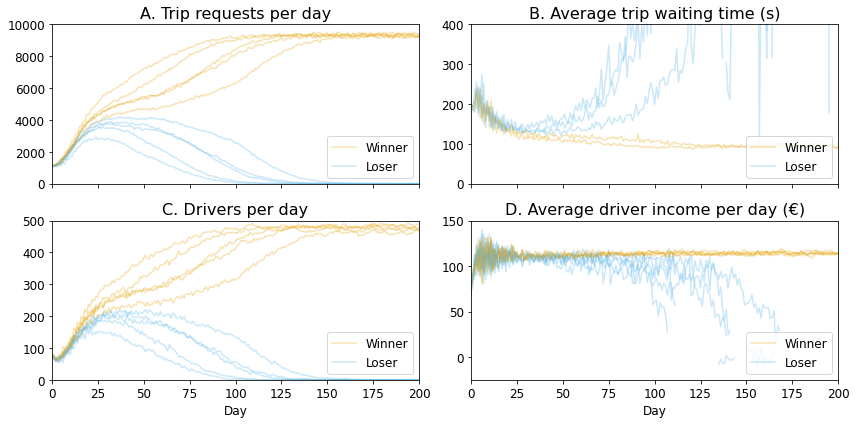

In [19]:
# Plot differentiating winning and losing platform (in case of solo-solo)

# Get unique 'a' values
# unique_cmpt_values = aggr_sup.index.get_level_values('cmpt_type').unique()
unique_cmpt_values = aggr_sup.index.get_level_values(var_name).unique()

# Create subplots
fig, axes = plt.subplots(2,2, figsize=(12, 6), sharex=True)
# Flatten axes array for easier indexing
axes = axes.flatten()

indicators = ['requests_sh', 'exp_corr_wait_sh', 'ptcp_sh', 'exp_inc_sh']
indicator_labels = ['A. Trip requests per day', 'B. Average trip waiting time (s)', 'C. Drivers per day', 'D. Average driver income per day (€)']
platforms = ['largest', 'smallest']
platform_labels = ['Winner', 'Loser']

# indicator_labels = ['Fleet size winner', 'Fleet size loser', 'Driver income per day - winner platform', 'Driver income per day - losing platform']
colors = ['#E69F00','#56B4E9','g','b','y']

# Plot data
for i, cmpt_type in enumerate(unique_cmpt_values):
    if cmpt_type == 'ss':
        for j, indicator in enumerate(indicators):
            df = aggr_dem.copy() if j <= 1 else aggr_sup.copy()
            ax = axes[j]
            for repl in aggr_sup.xs((cmpt_type)).index.get_level_values('repl').unique():
                for k, plf in enumerate(platforms):
                    subset = df.loc[(cmpt_type, repl), indicator + '_' + plf]
                    day_values = subset.index.get_level_values('day')
                    values = subset.values
                    non_nan_indices = ~np.isnan(values)
                    if repl == df.xs((cmpt_type)).index.get_level_values('repl').unique()[-1]:
                        ax.plot(day_values, values, label=f'{platform_labels[k]}', color=colors[k], alpha=0.3)
                    else:
                        ax.plot(day_values, values, color=colors[k], alpha=0.3)

            # elif j == 2:
            #     ax.set_ylabel('Driver income per day (€)')
            ax.set_title(f'{indicator_labels[j]}', fontsize=16)
            ax.legend(fontsize = 12, loc='lower right')
            ax.set_xlim(0,200)
            ax.tick_params(axis='both', which='major', labelsize=12)

axes[2].set_xlabel('Day', fontsize=12)
axes[3].set_xlabel('Day', fontsize=12)
axes[0].set_ylim(0, 10000)
axes[1].set_ylim(0,400)
axes[2].set_ylim(0,500)
axes[3].set_ylim(-25,150)

plt.tight_layout()
plt.savefig(os.path.join(experiment_path,'Evo-2sided.png'), facecolor='w', dpi=400)
plt.show()


In [30]:
aggr_sup.xs(('ss', 1))[['exp_inc_sh_0','exp_inc_sh_1']].head(50)
aggr_sup.xs(('ss', 1))[['ptcp_sh_0','ptcp_sh_1']].head(50)
aggr_dem.xs(('ss', 1))[['exp_corr_wait_sh_0','exp_corr_wait_sh_1']].head(50)
# aggr_dem.xs(('ss', 1))[['requests_sh_0','requests_sh_1']].head(50)

,exp_corr_wait_sh_0,exp_corr_wait_sh_1
day,,
0,188.352026,NaN
1,196.836923,NaN
2,182.653619,NaN
3,240.925176,NaN
4,170.781331,NaN
5,222.286802,NaN
6,165.318535,NaN
7,200.518847,NaN
8,176.594234,NaN


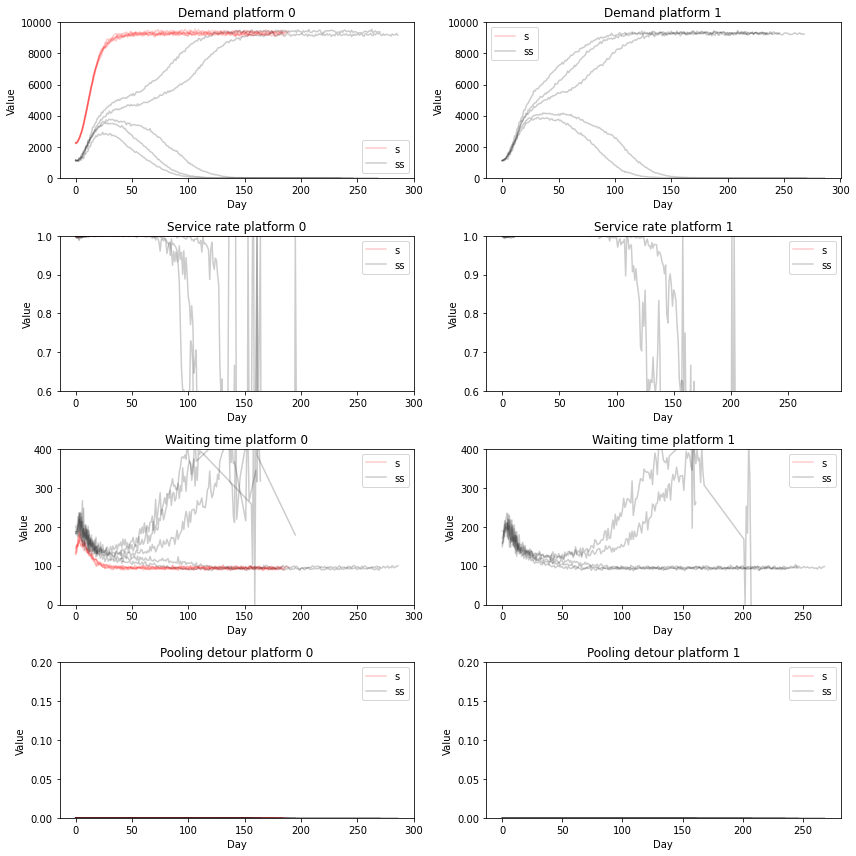

In [21]:
# Get unique 'a' values
# unique_cmpt_values = aggr_dem.index.get_level_values('cmpt_type').unique()
unique_cmpt_values = aggr_dem.index.get_level_values(var_name).unique()

# Create subplots
fig, axes = plt.subplots(4,2, figsize=(12, 12))

aggr_dem['service_rate_sh_0'] = aggr_dem['gets_offer_sh_0'] / aggr_dem['requests_sh_0']
aggr_dem['service_rate_sh_1'] = aggr_dem['gets_offer_sh_1'] / aggr_dem['requests_sh_1']

indicators = ['requests_sh', 'service_rate_sh', 'exp_wait_sh', 'exp_detour_sh']
indicator_labels = ['Demand', 'Service rate', 'Waiting time', 'Pooling detour']
colors = ['r','k','g','b','y']

for i, cmpt_type in enumerate(unique_cmpt_values):
    for j, indicator in enumerate(indicators):
        for plf in [0,1]:
            ax = axes[j, plf]
            for repl in aggr_dem.xs((cmpt_type)).index.get_level_values('repl').unique():
                subset = aggr_dem.loc[(cmpt_type, repl), indicator + '_{}'.format(plf)]
                day_values = subset.index.get_level_values('day')
                values = subset.values
                non_nan_indices = ~np.isnan(values)
                if repl == aggr_dem.xs((cmpt_type)).index.get_level_values('repl').unique()[-1]:
                    ax.plot(day_values[non_nan_indices], values[non_nan_indices], label='{}'.format(cmpt_type),color=colors[i], alpha=0.2)
                else:
                    ax.plot(day_values[non_nan_indices], values[non_nan_indices],color=colors[i], alpha=0.2)
            # ax.set_title(f'a={a_value} - {column}')
            ax.set_xlabel('Day')
            ax.set_ylabel('Value')
            ax.set_title('{} platform {}'.format(indicator_labels[j],plf))
            ax.legend()

axes[0,0].set_ylim(0,10000)
axes[0,1].set_ylim(0,10000)
axes[1,0].set_ylim(0.6,1)
axes[1,1].set_ylim(0.6,1)
axes[2,0].set_ylim(0,400)
axes[2,1].set_ylim(0,400)
axes[3,0].set_ylim(0,0.2)
axes[3,1].set_ylim(0,0.2)

plt.tight_layout()
plt.savefig(os.path.join(experiment_path,'Evo-demand.png'), facecolor='w')
plt.show()

In [22]:
# aggr_dem.xs(('3',cmpt_types[0],2)).requests_sh_0.plot()
# aggr_dem.xs((cmpt_types[2],2)).requests_sh_1
# aggr_dem.xs((cmpt_types[0],2)).requests_sh_0.plot()

In [23]:
cmpt_types

['s', 'ss']

KeyError: 'sp'

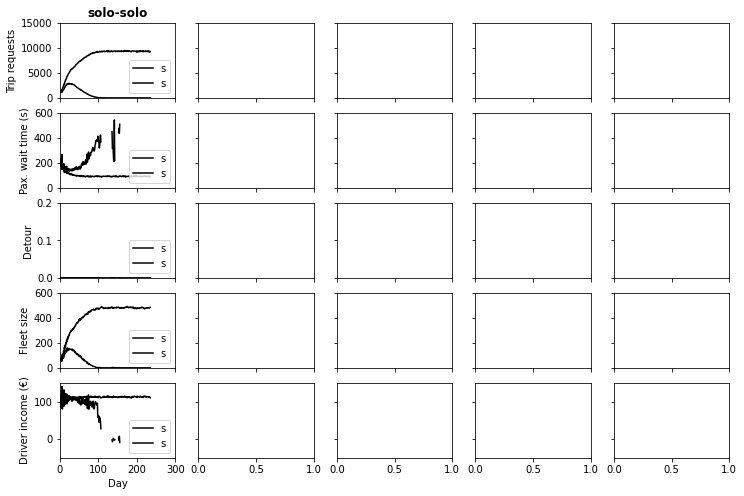

In [24]:
# All replications or 1?
one_repl = True

# Get unique 'a' values
indic_labels_dem = ['requests_sh','exp_wait_sh','exp_detour_sh']
indic_labels_sup = ['ptcp_sh','exp_inc_sh']

# Create a regular expression pattern for the prefixes
pattern_dem = '|'.join(f'^{prefix}' for prefix in indic_labels_dem)
pattern_sup = '|'.join(f'^{prefix}' for prefix in indic_labels_sup)

# Select columns that start with any of the specified prefixes
selected_columns_dem = aggr_dem.filter(regex=pattern_dem, axis=1)
selected_columns_sup = aggr_sup.filter(regex=pattern_sup, axis=1)

integ_df = pd.concat([selected_columns_dem, selected_columns_sup], axis=1)

# Replace zero service rate, waiting time and income by NaN if no driver or trav participates
integ_df.loc[integ_df['ptcp_sh_0'] == 0, ['exp_wait_sh_0', 'exp_detour_sh_0','exp_inc_sh_0']] = np.nan
integ_df.loc[integ_df['requests_sh_0'] == 0, ['exp_wait_sh_0', 'exp_detour_sh_0','exp_inc_sh_0']] = np.nan
integ_df.loc[integ_df['ptcp_sh_1'] == 0, ['exp_wait_sh_1', 'exp_detour_sh_1','exp_inc_sh_1']] = np.nan
integ_df.loc[integ_df['requests_sh_1'] == 0, ['exp_wait_sh_1', 'exp_detour_sh_1','exp_inc_sh_1']] = np.nan

# unique_cmpt_values = integ_df.index.get_level_values(var_name).unique()
unique_cmpt_values = ['ss','sp','pp','s','p']
cmpt_names = ['solo-solo','solo-pool','pool-pool','solo','pool']

indicators = integ_df.columns.values
indicator_labels = ['Requests', 'Wait time','Detour','Fleet size','Income']
yax_labels = ['Trip requests', 'Pax. wait time (s)', 'Detour', 'Fleet size', 'Driver income (\u20ac)']
yax_minmax = [[0,15000],[0,600],[0,0.2],[0,600],[-50,150]]

# Create subplots
fig, axes = plt.subplots(len(indic_labels_dem)+len(indic_labels_sup),len(unique_cmpt_values), figsize=(12, 8), sharey='row',sharex='col')

colors = ['r','k','g','b','y']

for i, cmpt_type in enumerate(unique_cmpt_values):
    for j, indicator in enumerate(indic_labels_dem + indic_labels_sup):
        # for plf in [0,1]:
            indic_plfs = [indicator+'_0',indicator+'_1']
            color_plf = ['k' if char == 's' else 'r' for char in cmpt_type]
            ax = axes[j, i]
            for repl in integ_df.xs((cmpt_type)).index.get_level_values('repl').unique():
                subset = integ_df.loc[(cmpt_type, repl), indic_plfs]
                day_values = subset.index.get_level_values('day')
                values = subset.values
                non_nan_indices = ~np.isnan(values)
                non_nan_indices = np.any(non_nan_indices, axis=1)
                if one_repl:
                     alpha = 1
                else:
                     alpha = 0.2
                if repl == integ_df.xs((cmpt_type)).index.get_level_values('repl').unique()[-1]:
                    ax.plot(day_values[non_nan_indices], values[non_nan_indices], label='{}'.format(cmpt_type),color=color_plf, alpha=alpha)
                else:
                    ax.plot(day_values[non_nan_indices], values[non_nan_indices,0],color=color_plf[0], alpha=alpha)
                    if len(color_plf) > 1:
                        ax.plot(day_values[non_nan_indices], values[non_nan_indices,1],color=color_plf[1], alpha=alpha)
                    if i != 0:
                        ax.set_ylabel('')
                ax.set_xlim(0, math.ceil(integ_df.index.get_level_values('day').max() / 50) * 50)

                if one_repl:
                    break

            if j == len(unique_cmpt_values)-1:
            # ax.set_title(f'a={a_value} - {column}')
                ax.set_xlabel('Day')
            if i == 0:
                ax.set_ylabel('{}'.format(yax_labels[j]))
            if j == 0:
                ax.set_title('{}'.format(cmpt_names[i]), fontweight = "bold")
            ax.legend(cmpt_type,loc='lower right')

            ax.set_ylim(yax_minmax[j][0],yax_minmax[j][1])

plt.tight_layout()
plt.savefig(os.path.join(experiment_path,'Evo-2s.png'), facecolor='w')
plt.show()


c:\Users\ge27fus\.conda\envs\fleetmaas\lib\site-packages\pandas\core\indexing.py:888: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


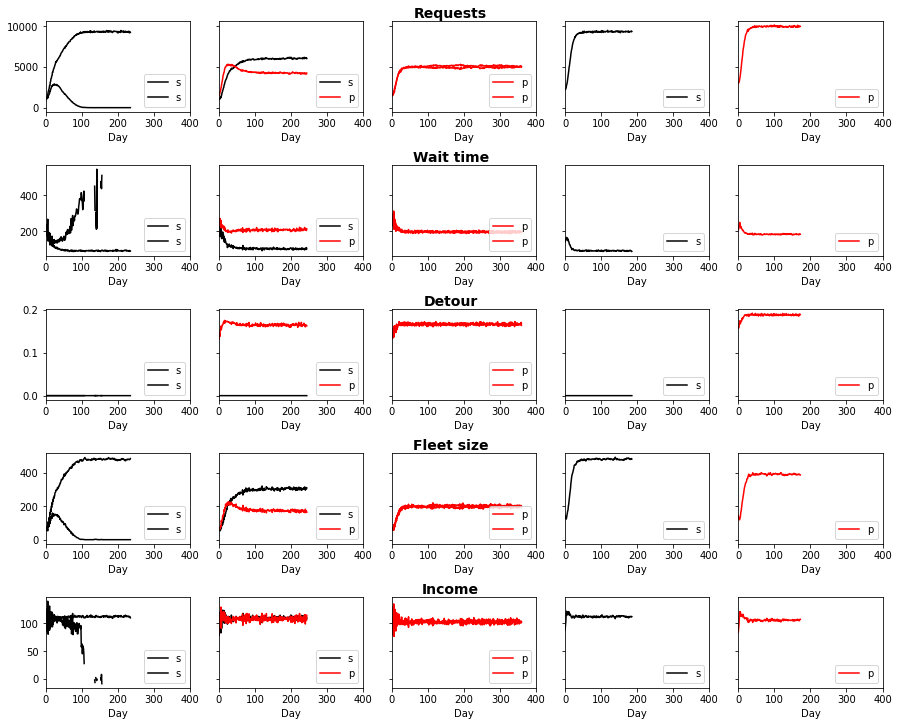

In [ ]:
# All replications or 1?
one_repl = True

# Get unique 'a' values
indic_labels_dem = ['requests_sh','exp_wait_sh','exp_detour_sh']
indic_labels_sup = ['ptcp_sh','exp_inc_sh']

# Create a regular expression pattern for the prefixes
pattern_dem = '|'.join(f'^{prefix}' for prefix in indic_labels_dem)
pattern_sup = '|'.join(f'^{prefix}' for prefix in indic_labels_sup)

# Select columns that start with any of the specified prefixes
selected_columns_dem = aggr_dem.filter(regex=pattern_dem, axis=1)
selected_columns_sup = aggr_sup.filter(regex=pattern_sup, axis=1)

integ_df = pd.concat([selected_columns_dem, selected_columns_sup], axis=1)

# Replace zero service rate, waiting time and income by NaN if no driver or trav participates
integ_df.loc[integ_df['ptcp_sh_0'] == 0, ['exp_wait_sh_0', 'exp_detour_sh_0','exp_inc_sh_0']] = np.nan
integ_df.loc[integ_df['requests_sh_0'] == 0, ['exp_wait_sh_0', 'exp_detour_sh_0','exp_inc_sh_0']] = np.nan
integ_df.loc[integ_df['ptcp_sh_1'] == 0, ['exp_wait_sh_1', 'exp_detour_sh_1','exp_inc_sh_1']] = np.nan
integ_df.loc[integ_df['requests_sh_1'] == 0, ['exp_wait_sh_1', 'exp_detour_sh_1','exp_inc_sh_1']] = np.nan

# unique_cmpt_values = integ_df.index.get_level_values(var_name).unique()
unique_cmpt_values = ['ss','sp','pp','s','p']

indicators = integ_df.columns.values
indicator_labels = ['Requests', 'Wait time','Detour','Fleet size','Income']
yax_labels = ['Requests', 'Wait time (s)', 'Detour', 'Fleet size','Income (\u20ac)']

# Create subplots
# fig, axes = plt.subplots(len(indic_labels_dem)+len(indic_labels_sup),len(unique_cmpt_values), figsize=(12, 15), sharey='row')
fig = plt.figure(constrained_layout=False, figsize=(15,10))
# fig.suptitle('Figure title')
# colors = ['r','k','g','b','y']

subfigs = fig.subfigures(nrows=len(indic_labels_dem)+len(indic_labels_sup), ncols=1)
for row, subfig in enumerate(subfigs):
    subfig.suptitle(f'{indicator_labels[row]}',fontweight="bold",size=14)
    indicator = (indic_labels_dem + indic_labels_sup)[row]

    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=len(unique_cmpt_values), sharey=True, sharex=True)
    for col, ax in enumerate(axs):
        cmpt_type = unique_cmpt_values[col]
        ax.plot()

# for i, cmpt_type in enumerate(unique_cmpt_values):
#     for j, indicator in enumerate(indic_labels_dem + indic_labels_sup):
        indic_plfs = [indicator+'_0',indicator+'_1']
        color_plf = ['k' if char == 's' else 'r' for char in cmpt_type]
        # ax = axes[j, i]
        for repl in integ_df.xs((cmpt_type)).index.get_level_values('repl').unique():
            subset = integ_df.loc[(cmpt_type, repl), indic_plfs]
            day_values = subset.index.get_level_values('day')
            values = subset.values
            non_nan_indices = ~np.isnan(values)
            non_nan_indices = np.any(non_nan_indices, axis=1)
            if one_repl:
                    alpha = 1
            else:
                    alpha = 0.2
            if repl == integ_df.xs((cmpt_type)).index.get_level_values('repl').unique()[-1]:
                ax.plot(day_values[non_nan_indices], values[non_nan_indices], label='{}'.format(cmpt_type),color=color_plf, alpha=alpha)
            else:
                ax.plot(day_values[non_nan_indices], values[non_nan_indices,0],color=color_plf[0], alpha=alpha)
                if len(color_plf) > 1:
                    ax.plot(day_values[non_nan_indices], values[non_nan_indices,1],color=color_plf[1], alpha=alpha)
            ax.set_xlim(0, math.ceil(integ_df.index.get_level_values('day').max() / 50) * 50)

            # if col != 0:
                    # ax.set_ylabel('')
                # else:
                    # print(yax_labels[row])
            ax.set_ylabel(''.format(yax_labels[row])) 

            if one_repl:
                break

        # ax.set_title(f'a={a_value} - {column}')
        ax.set_xlabel('Day')
        # ax.set_title('{}'.format(indicator_labels[j]))
        ax.legend(cmpt_type,loc='lower right')

# plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.savefig(os.path.join(experiment_path,'Evo-2s.png'), facecolor='w')
plt.show()


In [ ]:
col

4

c:\Users\ge27fus\.conda\envs\fleetmaas\lib\site-packages\pandas\core\indexing.py:888: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels 

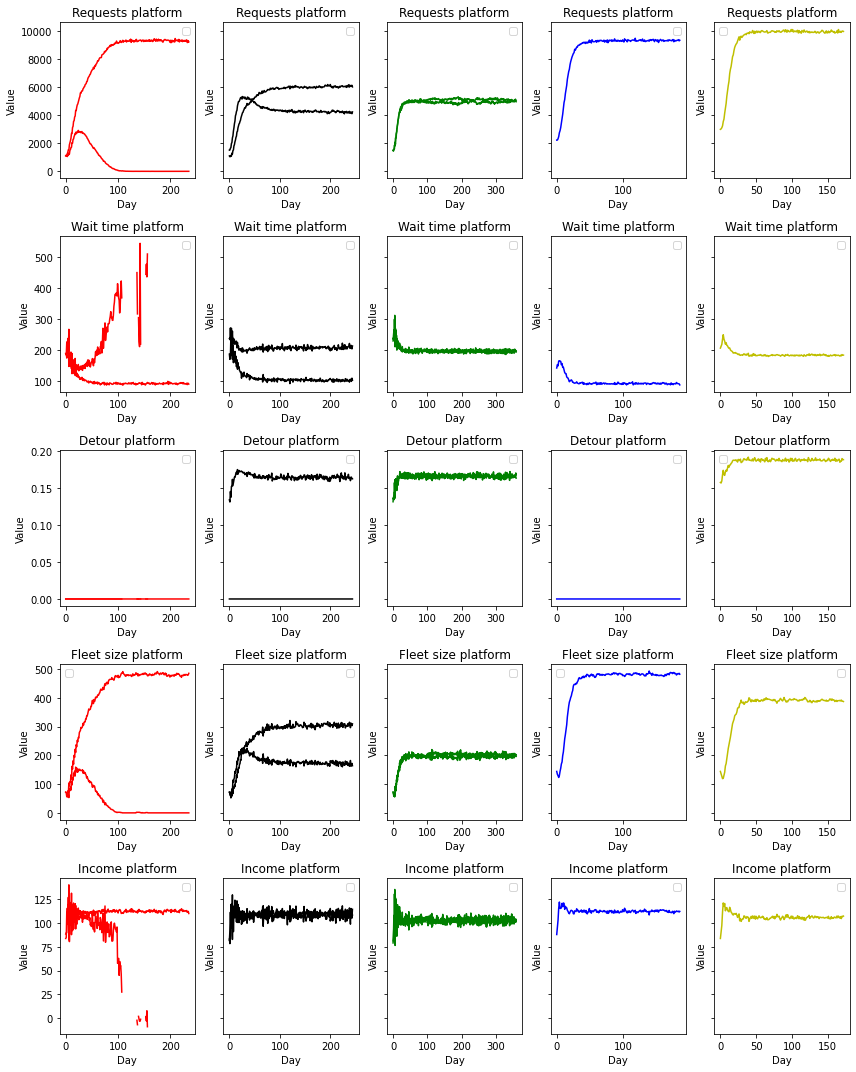

In [ ]:
# All replications or 1?
one_repl = True

# Get unique 'a' values
indic_labels_dem = ['requests_sh','exp_wait_sh','exp_detour_sh']
indic_labels_sup = ['ptcp_sh','exp_inc_sh']

# Create a regular expression pattern for the prefixes
pattern_dem = '|'.join(f'^{prefix}' for prefix in indic_labels_dem)
pattern_sup = '|'.join(f'^{prefix}' for prefix in indic_labels_sup)

# Select columns that start with any of the specified prefixes
selected_columns_dem = aggr_dem.filter(regex=pattern_dem, axis=1)
selected_columns_sup = aggr_sup.filter(regex=pattern_sup, axis=1)

integ_df = pd.concat([selected_columns_dem, selected_columns_sup], axis=1)

# Replace zero service rate, waiting time and income by NaN if no driver or trav participates
integ_df.loc[integ_df['ptcp_sh_0'] == 0, ['exp_wait_sh_0', 'exp_detour_sh_0','exp_inc_sh_0']] = np.nan
integ_df.loc[integ_df['requests_sh_0'] == 0, ['exp_wait_sh_0', 'exp_detour_sh_0','exp_inc_sh_0']] = np.nan
integ_df.loc[integ_df['ptcp_sh_1'] == 0, ['exp_wait_sh_1', 'exp_detour_sh_1','exp_inc_sh_1']] = np.nan
integ_df.loc[integ_df['requests_sh_1'] == 0, ['exp_wait_sh_1', 'exp_detour_sh_1','exp_inc_sh_1']] = np.nan

# unique_cmpt_values = integ_df.index.get_level_values(var_name).unique()
unique_cmpt_values = ['ss','sp','pp','s','p']

indicators = integ_df.columns.values
indicator_labels = ['Requests', 'Wait time','Detour','Fleet size','Income']

# Create subplots
fig, axes = plt.subplots(len(indic_labels_dem)+len(indic_labels_sup),len(unique_cmpt_values), figsize=(12, 15), sharey='row')

colors = ['r','k','g','b','y']

for i, cmpt_type in enumerate(unique_cmpt_values):
    for j, indicator in enumerate(indic_labels_dem + indic_labels_sup):
        # for plf in [0,1]:
            indic_plfs = [indicator+'_0',indicator+'_1']
            ax = axes[j, i]
            for repl in integ_df.xs((cmpt_type)).index.get_level_values('repl').unique():
                subset = integ_df.loc[(cmpt_type, repl), indic_plfs]
                day_values = subset.index.get_level_values('day')
                values = subset.values
                non_nan_indices = ~np.isnan(values)
                non_nan_indices = np.any(non_nan_indices, axis=1)
                if one_repl:
                     alpha = 1
                else:
                     alpha = 0.2
                if repl == integ_df.xs((cmpt_type)).index.get_level_values('repl').unique()[-1]:
                    ax.plot(day_values[non_nan_indices], values[non_nan_indices], label='{}'.format(cmpt_type),color=colors[i], alpha=alpha)
                else:
                    ax.plot(day_values[non_nan_indices], values[non_nan_indices],color=colors[i], alpha=alpha)
                if one_repl:
                    break

            # ax.set_title(f'a={a_value} - {column}')
            ax.set_xlabel('Day')
            ax.set_ylabel('Value')
            ax.set_title('{} platform'.format(indicator_labels[j]))
            ax.legend()

# axes[0,0].set_ylim(0,500)
# axes[0,1].set_ylim(0,500)
# axes[1,0].set_ylim(50,140)
# axes[1,1].set_ylim(50,140)

plt.tight_layout()
plt.savefig(os.path.join(experiment_path,'Evo-2s.png'), facecolor='w')
plt.show()


In [ ]:
aggr_dem.xs('ss').exp_wait_sh_0

repl  day
0     0      188.202814
      1      183.701804
      2      226.074443
      3      207.347055
      4      237.385104
                ...    
2     264      0.000000
      265      0.000000
      266      0.000000
      267      0.000000
      268      0.000000
Name: exp_wait_sh_0, Length: 776, dtype: float64

In [ ]:
integ_df

requests_sh_0  requests_sh_1  exp_wait_sh_0  \
cmpt_type repl day                                                
s         0    0             2230            NaN     142.324728   
               1             2232            NaN     153.191754   
               2             2329            NaN     149.223881   
               3             2484            NaN     164.721799   
               4             2757            NaN     165.818660   
...                           ...            ...            ...   
sp        2    254           6072         4339.0     103.862130   
               255           5925         4281.0     105.107593   
               256           5994         4247.0     106.093031   
               257           5975         4336.0     100.763515   
               258           6015         4237.0     106.388775   

                    exp_wait_sh_1  exp_detour_sh_0  exp_detour_sh_1  \
cmpt_type repl day                                                    
s         0    0              NaN    -2.724133e-07              NaN   
               1              NaN     8.913979e-07              NaN   
               2              NaN     1.477886e-06              NaN   
               3              NaN     7.283142e-07              NaN   
               4              NaN     3.206323e-07              NaN   
...                           ...              ...              ...   
sp        2    254     210.649783    -5.723352e-07         0.163259   
               255     201.601227    -1.402777e-07         0.158848   
               256     209.113158    -1.172639e-07         0.164369   
               257     209.433470     1.332376e-07         0.160827   
               258     205.855651     5.685866e-08         0.160678   

                    ptcp_sh_0  ptcp_sh_1  exp_inc_sh_0  exp_inc_sh_1  
cmpt_type repl day                                                    
s         0    0          144        NaN     87.878872           NaN  
               1          134        NaN     95.047239           NaN  
               2          129        NaN    103.120252           NaN  
               3          123        NaN    115.706159           NaN  
               4          130        NaN    122.038962           NaN  
...                       ...        ...           ...           ...  
sp        2    254        298      169.0    113.480881    113.966006  
               255        296      176.0    112.294307    107.050781  
               256        306      166.0    109.811708    112.057274  
               257        303      172.0    110.135677    110.905174  
               258        303      173.0    110.456815    108.285867  

[3388 rows x 10 columns]

In [ ]:
# conv_steady_days = 10
# moving_average_days = 50
# eql_dem = aggr_dem.groupby(['label'], sort=False).tail(conv_steady_days + moving_average_days).groupby(['label'],sort=False).mean()
# eql_sup = aggr_sup.groupby(['label'], sort=False).tail(conv_steady_days + moving_average_days).groupby(['label'],sort=False).mean()

In [ ]:
aggr_sup

informed_mh  informed_sh  registered_mh  registered_sh_0  \
cmpt_type repl day                                                             
s         0    0            NaN          644            NaN              234   
               1            NaN          748            NaN              234   
               2            NaN          819            NaN              229   
               3            NaN          910            NaN              230   
               4            NaN         1004            NaN              239   
...                         ...          ...            ...              ...   
sp        2    254          NaN         2500            NaN              373   
               255          NaN         2500            NaN              381   
               256          NaN         2500            NaN              377   
               257          NaN         2500            NaN              377   
               258          NaN         2500            NaN              378   

                    registered_sh_1  ptcp_mh  ptcp_sh_0  ptcp_sh_1  \
cmpt_type repl day                                                   
s         0    0                NaN      NaN        144        NaN   
               1                NaN      NaN        134        NaN   
               2                NaN      NaN        129        NaN   
               3                NaN      NaN        123        NaN   
               4                NaN      NaN        130        NaN   
...                             ...      ...        ...        ...   
sp        2    254            202.0      NaN        298      169.0   
               255            194.0      NaN        296      176.0   
               256            199.0      NaN        306      166.0   
               257            199.0      NaN        303      172.0   
               258            199.0      NaN        303      173.0   

                    exp_inc_mh  exp_inc_sh_0  ...  perc_inc_mh  perc_inc_sh_0  \
cmpt_type repl day                            ...                               
s         0    0           NaN     87.878872  ...          NaN     161.943664   
               1           NaN     95.047239  ...          NaN     143.385035   
               2           NaN    103.120252  ...          NaN     133.856145   
               3           NaN    115.706159  ...          NaN     129.656082   
               4           NaN    122.038962  ...          NaN     128.360722   
...                        ...           ...  ...          ...            ...   
sp        2    254         NaN    113.480881  ...          NaN     111.916570   
               255         NaN    112.294307  ...          NaN     111.914217   
               256         NaN    109.811708  ...          NaN     111.745095   
               257         NaN    110.135677  ...          NaN     111.590886   
               258         NaN    110.456815  ...          NaN     111.499176   

                    perc_inc_sh_1  new_regist_sh_0  new_deregist_sh_0  \
cmpt_type repl day                                                      
s         0    0              NaN                0                  0   
               1              NaN               11                 11   
               2              NaN               12                 17   
               3              NaN               23                 22   
               4              NaN               23                 14   
...                           ...              ...                ...   
sp        2    254     109.913248               11                 16   
               255     109.708732               19                 11   
               256     109.841165               13                 17   
               257     109.890305               11                 11   
               258     109.749577               15                 14   

                    new_regist_sh_1  new_deregist_sh_1  new_regi

In [ ]:
# # Create subplots within a single figure
# n_rows = 2
# n_cols = 4
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 10))

# indicators = ['registered_sh', 'requests_sh','service_rate_sh', 'exp_wait_sh', 'exp_detour_sh', 'registered_sh', 'ptcp_sh', 'exp_inc_sh']
# stacked = [True, True, False, False, False, True, True, False]
# type = ['dem', 'dem', 'dem', 'dem', 'dem', 'sup', 'sup', 'sup']

# i = 0
# for j, indicator in enumerate(indicators):
    
#     k = j - i*n_cols
#         # ax.bar(height=eql_dem[indicators[j]], x=eql_dem.index.values)
    
#     if type[j] == 'dem':
#         if stacked[j]:
#             eql_dem[['{}_0'.format(indicators[j]),'{}_1'.format(indicators[j])]].plot(kind='bar', stacked=True, ax = axes[i, k], width=0.8)
#         else:
#             eql_dem[['{}_0'.format(indicators[j]),'{}_1'.format(indicators[j])]].plot(kind='bar', stacked=False, ax = axes[i, k], width = 0.8)
#     else:
#         if stacked[j]:
#             eql_sup[['{}_0'.format(indicators[j]),'{}_1'.format(indicators[j])]].plot(kind='bar', stacked=True, ax = axes[i, k], width=0.8)
#         else:
#             eql_sup[['{}_0'.format(indicators[j]),'{}_1'.format(indicators[j])]].plot(kind='bar', stacked=False, ax = axes[i, k], width = 0.8)
    
#     ax.set_xlabel('Day')
#     ax.set_ylabel(indicators[j])
#     ax.set_title(f'Column: {indicators[j]}')
#     ax.legend()

#     if j == n_cols-1:
#         i+=1


# axes[0,0].set_ylim(0,35000)
# # axes[0,1].set_ylim(0,10000)

# plt.tight_layout()
# plt.savefig('Eql-dem-indicators.png', facecolor='w')

(0.0, 415.0)

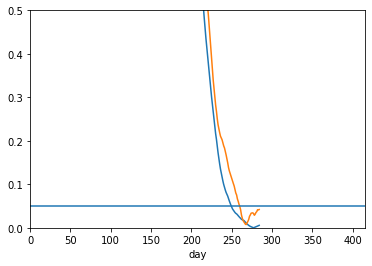

In [ ]:
aggr_sup.xs(('3', cmpt_types[0], 1), level=[var_name, 'cmpt_type', 'repl']).ptcp_sh_0.rolling(25).mean().rolling(100).mean().diff().abs().plot()
aggr_sup.xs(('3', cmpt_types[0], 1), level=[var_name, 'cmpt_type', 'repl']).ptcp_sh_1.rolling(25).mean().rolling(100).mean().diff().abs().plot()
# aggr_sup.xs(('sp', 3), level=['cmpt_type', 'repl']).ptcp_0.rolling(25).mean().rolling(50).mean().diff().abs().plot()
plt.axhline(y=0.05)
# plt.axhline(y=0.1)
plt.ylim(0,0.5)
plt.xlim(0,415)

# aggr_sup.xs(('sp', 4), level=['cmpt_type', 'repl']).ptcp_sh_1.rolling(25).mean().rolling(50).mean().tail(10).diff().abs() < 10

<AxesSubplot:xlabel='day'>

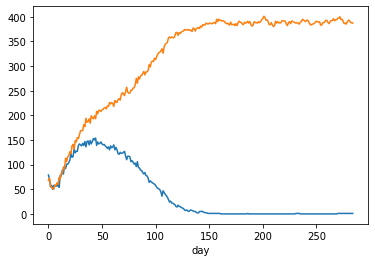

In [ ]:
aggr_sup.xs(('3', cmpt_types[0], 1), level=[var_name, 'cmpt_type', 'repl']).ptcp_sh_0.plot()
aggr_sup.xs(('3', cmpt_types[0], 1), level=[var_name, 'cmpt_type', 'repl']).ptcp_sh_1.plot()

In [ ]:
aggr_sup.xs(('0.1'), level='start_reg_plf_share').head(20)

informed_mh  informed_sh  registered_mh  registered_sh_0  \
cmpt_type repl day                                                             
sp        0    0            NaN          641            NaN               24   
               1            NaN          750            NaN               23   
               2            NaN          837            NaN               20   
               3            NaN          906            NaN               19   
               4            NaN          971            NaN               19   
               5            NaN         1033            NaN               17   
               6            NaN         1088            NaN               15   
               7            NaN         1154            NaN               13   
               8            NaN         1228            NaN               11   
               9            NaN         1291            NaN                9   
               10           NaN         1349            NaN                9   
               11           NaN         1419            NaN                8   
               12           NaN         1481            NaN                6   
               13           NaN         1539            NaN                6   
               14           NaN         1595            NaN                5   
               15           NaN         1649            NaN                3   
               16           NaN         1708            NaN                3   
               17           NaN         1756            NaN                3   
               18           NaN         1807            NaN                3   
               19           NaN         1855            NaN                2   

                    registered_sh_1  ptcp_mh  ptcp_sh_0  ptcp_sh_1  \
cmpt_type repl day                                                   
sp        0    0                207      NaN         14        141   
               1                195      NaN         14        119   
               2                193      NaN         11         97   
               3                194      NaN          9         93   
               4                189      NaN          8         90   
               5                189      NaN          6         97   
               6                187      NaN          5        101   
               7                192      NaN          4        107   
               8                198      NaN          2        113   
               9                211      NaN          2        124   
               10               221      NaN          1        134   
               11               222      NaN          1        142   
               12               234      NaN          1        146   
               13               229      NaN          0        159   
               14               228      NaN          0        156   
               15               226      NaN          0        157   
               16               226      NaN          0        158   
               17               224      NaN          0        159   
               18               223      NaN          0        158   
               19               218      NaN          0        157   

                    exp_inc_mh  exp_inc_sh_0  ...  perc_inc_mh  perc_inc_sh_0  \
cmpt_type repl day                            ...                               
sp        0    0           NaN     70.676071  ...          NaN      94.505834   
               1           NaN     61.809464  ...          NaN      78.623125   
               2           NaN     65.631364  ...          NaN      73.035214   
               3           NaN     72.561389  ...          NaN      72.942439   
               4           NaN     68.586562  ...          NaN      71.948510   
               5           NaN     73.953750  ...          NaN      72.318174   
               6           NaN     65.675500  ...          NaN      71

(0.0, 10.0)

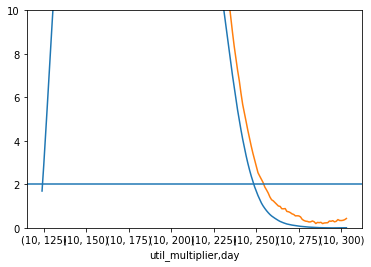

In [ ]:
aggr_dem.xs((cmpt_types[0], 4), level=['cmpt_type', 'repl']).requests_sh_0.rolling(25).mean().rolling(100).mean().diff().abs().plot()
aggr_dem.xs((cmpt_types[0], 4), level=['cmpt_type', 'repl']).requests_sh_1.rolling(25).mean().rolling(100).mean().diff().abs().plot()
# aggr_sup.xs(('sp', 3), level=['cmpt_type', 'repl']).ptcp_0.rolling(25).mean().rolling(50).mean().diff().abs().plot()
# plt.axhline(y=0)
plt.axhline(y=2)
plt.ylim(0,10)
# plt.xlim(0,415)

In [ ]:
# Create df with market (system) level indicators
aggr_dem_reset = aggr_dem.reset_index()
aggr_sup_reset = aggr_sup.reset_index()
market_df = aggr_dem_reset.reset_index().copy()[['day','label']]
market_df['tot_regist_dem'] = aggr_dem_reset.registered_mh + aggr_dem_reset.registered_sh_0 + aggr_dem_reset.registered_sh_1.fillna(0)
market_df['market_share'] = (aggr_dem_reset.accepts_offer_0 + aggr_dem_reset.accepts_offer_1.fillna(0)) / 100000
# market_df['exp_wait'] = aggr_dem_reset.corr_xp_wait
# market_df['exp_ivt'] = aggr_dem_reset.xp_ivt
market_df['tot_regist_sup'] = aggr_sup_reset.registered_mh + aggr_sup_reset.registered_sh_0 + aggr_sup_reset.registered_sh_1.fillna(0)
market_df['tot_ptcp'] = aggr_sup_reset.ptcp_mh + aggr_sup_reset.ptcp_sh_0 + aggr_sup_reset.ptcp_sh_1.fillna(0)
market_df['exp_inc'] = aggr_sup_reset.exp_inc
# market_df['perc_inc_reg_mh'] = aggr_sup_reset.perc_inc_reg_mh
# market_df['perc_inc_notreg_mh'] = aggr_sup_reset.perc_inc_notreg_mh
market_df['rel_pickup_dist'] = aggr_sup_reset.pickup_dist / market_df.market_share / 100000
market_df['rel_repos_dist'] = aggr_sup_reset.repos_dist / market_df.market_share / 100000
market_df['rel_serving_dist'] = (aggr_sup_reset.km_occ_1.fillna(0) + aggr_sup_reset.km_occ_2.fillna(0) + aggr_sup_reset.km_occ_3.fillna(0) + aggr_sup_reset.km_occ_4.fillna(0)) / market_df.market_share / 100000
market_df['driver_per_req'] = market_df.tot_ptcp / market_df.market_share / 100000
market_df['service_rate'] = (aggr_dem_reset.accepts_offer_0 + aggr_dem_reset.accepts_offer_1.fillna(0)) / (aggr_dem_reset.requests_mh + aggr_dem_reset.requests_sh_0 + aggr_dem_reset.requests_sh_1.fillna(0))
market_df['service_rate_0'] = aggr_dem_reset.gets_offer_0 / aggr_dem_reset.requests_0
market_df['service_rate_1'] = aggr_dem_reset.gets_offer_1 / aggr_dem_reset.requests_1

AttributeError: 'DataFrame' object has no attribute 'accepts_offer_0'

In [ ]:
# plot data in stack manner of bar type
eql_dem['rs'] = eql_dem.accepts_offer_0 + eql_dem.accepts_offer_1.fillna(0)

# Create the stacked bar chart
ax = (eql_dem[['rs','bike','car','pt']] / 100000 * 100).reset_index().plot(x='label', kind='bar', stacked=True,
        title='Modal share under different ridesourcing service types')

# # Label bars with their values
# for container in ax.containers:
#     ax.bar_label(container, label_type='center', fontsize=10, padding=3, labels=[f'{h:.2f}' for h in container.get_heights()])

# Label bars with their values
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10, padding=3, fmt='%.1f%%')
# Show the plot
plt.ylabel('Modal share (%)')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

NameError: name 'eql_dem' is not defined

In [ ]:
eql_dem.keys()

Index(['informed', 'registered_0', 'requests_0', 'gets_offer_0',
       'accepts_offer_0', 'bike', 'car', 'pt', 'time_occ_1',
       'init_perc_wait_0', 'xp_wait_0', 'corr_xp_wait_0', 'init_perc_ivt_0',
       'xp_ivt_0', 'init_perc_km_fare_0', 'xp_km_fare_0', 'informed_mh',
       'informed_sh', 'registered_mh', 'registered_sh_0', 'registered_sh_1',
       'requests_mh', 'requests_sh_0', 'requests_sh_1', 'gets_offer_mh_0',
       'gets_offer_mh_1', 'gets_offer_sh_0', 'gets_offer_sh_1',
       'accepts_offer_mh_0', 'accepts_offer_mh_1', 'exp_wait_mh',
       'exp_wait_sh_0', 'exp_wait_sh_1', 'exp_corr_wait_mh',
       'exp_corr_wait_sh_0', 'exp_corr_wait_sh_1', 'exp_ivt_mh',
       'exp_ivt_sh_0', 'exp_ivt_sh_1', 'exp_km_fare_mh', 'exp_km_fare_sh_0',
       'exp_km_fare_sh_1', 'perc_wait_mh', 'perc_wait_sh_0', 'perc_wait_sh_1',
       'perc_ivt_mh', 'perc_ivt_sh_0', 'perc_ivt_sh_1', 'perc_km_fare_mh',
       'perc_km_fare_sh_0', 'perc_km_fare_sh_1', 'eff_pax_dist_0',
       'eff_pax_di

In [ ]:
mode_df

,no_rs_bike,no_rs_car,no_rs_pt,other_trav_bike,other_trav_car,other_trav_pt
label,,,,,,
s,15254.2,10212.2,6016.4,57613.8,8337.6,2565.8
p,15254.2,10212.2,6016.4,57613.8,8337.6,2565.8
ss,15254.2,10212.2,6016.4,57613.8,8337.6,2565.8
pp,15254.2,10212.2,6016.4,57613.8,8337.6,2565.8
sp,15254.2,10212.2,6016.4,57613.8,8337.6,2565.8


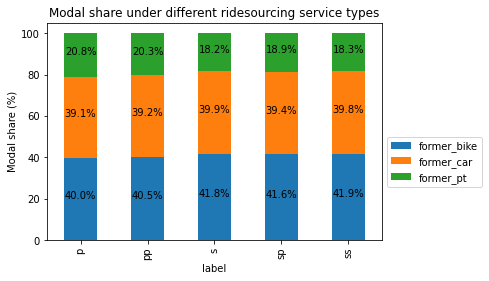

In [ ]:
# Create the stacked bar chart
ax = (eql_dem[['former_bike','former_car','former_pt']]).div((eql_dem['requests_0'] + eql_dem['requests_1'].fillna(0)) / 100, axis=0).reset_index().plot(x='label', kind='bar', stacked=True,
        title='Modal share under different ridesourcing service types')

# # Label bars with their values
# for container in ax.containers:
#     ax.bar_label(container, label_type='center', fontsize=10, padding=3, labels=[f'{h:.2f}' for h in container.get_heights()])

# Label bars with their values
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10, padding=3, fmt='%.1f%%')
# Show the plot
plt.ylabel('Modal share (%)')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

# waarom 50 procent bij requests_sh_0, requests_sh_1 en requests_mh, gaat iets fout? heeft iets met singlehoming en multihoming te maken? bars zijn ook niet helemaal gelijk?
# dit plaatje met accepts_offer kan meer zijn dan 1 omdat er ook requests worden afggewezen?
# Note: requests is niet goed als er multi-homers zijn. Bars zijn ook niet allemaal gelijk?

In [ ]:
eql_sup.perc_inc_sh_1

label
p            NaN
pp     90.855327
s            NaN
sp     92.517338
ss    103.892037
Name: perc_inc_sh_1, dtype: float64

In [ ]:
eql_dem.former_bike + eql_dem.former_car + eql_dem.former_pt

label
p     7689.365000
pp    8253.585000
s     8274.950000
sp    8585.223333
ss    8475.010000
dtype: float64

In [ ]:
eql_dem.eff_pax_dist_0 / 1000

label
p     47533.505327
pp    25584.902239
s     51745.611390
sp    34966.154447
ss    26476.082616
Name: eff_pax_dist_0, dtype: float64

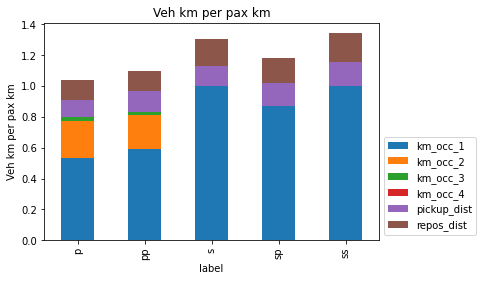

In [ ]:
# Create the stacked bar chart
ax = (eql_sup[['km_occ_1','km_occ_2','km_occ_3','km_occ_4','pickup_dist','repos_dist']]).div((eql_dem['eff_pax_dist_0'] + eql_dem['eff_pax_dist_1'].fillna(0)) / 1000, axis=0).reset_index().plot(x='label', kind='bar', stacked=True,
        title='Veh km per pax km')

# # Label bars with their values
# for container in ax.containers:
#     ax.bar_label(container, label_type='center', fontsize=10, padding=3, labels=[f'{h:.2f}' for h in container.get_heights()])

# Label bars with their values
# for container in ax.containers:
#     ax.bar_label(container, label_type='center', fontsize=10, padding=3, fmt='%.2f')
# Show the plot
plt.ylabel('Veh km per pax km')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()


In [ ]:
aggr_sup.xs('s',level=0,axis=0).exp_inc_sh_0.tail(20)

day
185    109.040644
186    109.076793
187    109.409295
188    107.938524
189    107.399305
190    107.638087
191    108.258073
192    107.999924
193    108.714377
194    107.990775
195    108.874167
196    108.769705
197    108.490569
198    108.642437
199    107.078370
200    107.857525
201    106.723025
202    108.418285
203    109.111213
204    107.587786
Name: exp_inc_sh_0, dtype: float64

In [ ]:
aggr_sup.xs('s',level=0,axis=0).perc_inc_sh_0.tail(20)

day
185    107.807821
186    107.899680
187    108.019020
188    108.124763
189    108.088479
190    107.972919
191    107.988397
192    107.932681
193    107.894790
194    107.999644
195    107.969617
196    107.987790
197    108.021464
198    108.010366
199    108.038841
200    107.847840
201    107.715811
202    107.221594
203    107.874413
204    108.563100
Name: perc_inc_sh_0, dtype: float64

<AxesSubplot:xlabel='day'>

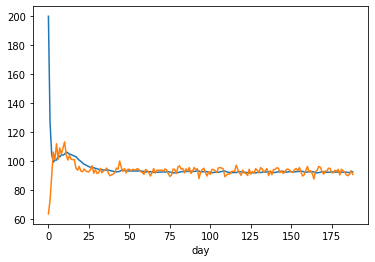

In [ ]:
aggr_sup.xs('sp',level=0,axis=0).perc_inc_sh_1.plot()
aggr_sup.xs('sp',level=0,axis=0).exp_inc_sh_1.plot()